
## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cancer_classification.csv')

In [3]:
data.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [4]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [5]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [6]:
data.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

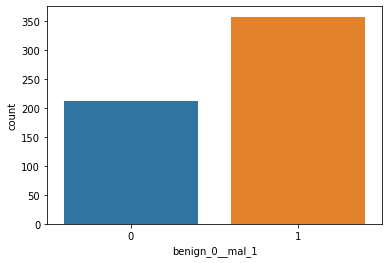

In [7]:
sns.countplot(x='benign_0__mal_1',data=data)

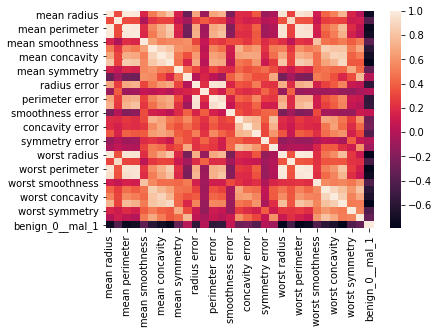

In [8]:
sns.heatmap(data.corr())

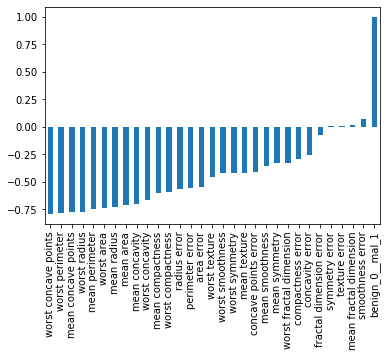

In [9]:
data.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [10]:
x = data.drop('benign_0__mal_1',axis=1).values
y = data['benign_0__mal_1'].values

In [11]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [15]:
X_test.shape

(188, 30)

In [16]:
y_test.reshape(-1,1).shape

(188, 1)

# Scaling data

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

# Tensor Flow neural network model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [22]:
X_train.shape

(381, 30)

In [23]:
model = Sequential()



model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [24]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
12/12 [==============================] - 1s 11ms/step - loss: 0.6709 - val_loss: 0.6383
Epoch 2/600
12/12 [==============================] - 0s 3ms/step - loss: 0.6258 - val_loss: 0.5965
Epoch 3/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5838 - val_loss: 0.5541
Epoch 4/600
12/12 [==============================] - 0s 3ms/step - loss: 0.5409 - val_loss: 0.5110
Epoch 5/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4981 - val_loss: 0.4692
Epoch 6/600
12/12 [==============================] - 0s 3ms/step - loss: 0.4556 - val_loss: 0.4274
Epoch 7/600
12/12 [==============================] - 0s 2ms/step - loss: 0.4140 - val_loss: 0.3865
Epoch 8/600
12/12 [==============================] - 0s 2ms/step - loss: 0.3733 - val_loss: 0.3523
Epoch 9/600
12/12 [==============================] - 0s 2ms/step - loss: 0.3373 - val_loss: 0.3205
Epoch 10/600
12/12 [==============================] - 0s 3ms/step - loss: 0.3063 - val_loss: 0.2920
Epoch 11

12/12 [==============================] - 0s 3ms/step - loss: 0.0504 - val_loss: 0.0581
Epoch 84/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0517 - val_loss: 0.0620
Epoch 85/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0506 - val_loss: 0.0579
Epoch 86/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0506 - val_loss: 0.0585
Epoch 87/600
12/12 [==============================] - ETA: 0s - loss: 0.035 - 0s 3ms/step - loss: 0.0499 - val_loss: 0.0627
Epoch 88/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0490 - val_loss: 0.0576
Epoch 89/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0495 - val_loss: 0.0570
Epoch 90/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0493 - val_loss: 0.0580
Epoch 91/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0487 - val_loss: 0.0578
Epoch 92/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0501 - val_lo

Epoch 164/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0334 - val_loss: 0.0567
Epoch 165/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0369 - val_loss: 0.0665
Epoch 166/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0351 - val_loss: 0.0610
Epoch 167/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0344 - val_loss: 0.0642
Epoch 168/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0314 - val_loss: 0.0606
Epoch 169/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0585
Epoch 170/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0322 - val_loss: 0.0617
Epoch 171/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0337 - val_loss: 0.0655
Epoch 172/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0358 - val_loss: 0.0635
Epoch 173/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0351 - val_los

12/12 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.0706
Epoch 246/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0223 - val_loss: 0.0691
Epoch 247/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0769
Epoch 248/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0211 - val_loss: 0.0738
Epoch 249/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0218 - val_loss: 0.0763
Epoch 250/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0232 - val_loss: 0.0758
Epoch 251/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0750
Epoch 252/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.0688
Epoch 253/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0233 - val_loss: 0.0733
Epoch 254/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0205 - val_loss: 0.0762
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0149 - val_loss: 0.0877
Epoch 327/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0879
Epoch 328/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0156 - val_loss: 0.0869
Epoch 329/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0155 - val_loss: 0.0849
Epoch 330/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0136 - val_loss: 0.0876
Epoch 331/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0142 - val_loss: 0.0816
Epoch 332/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0139 - val_loss: 0.1035
Epoch 333/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0844
Epoch 334/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0140 - val_loss: 0.0915
Epoch 335/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0135 - val_loss: 0.0840
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0104 - val_loss: 0.1001
Epoch 408/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.1040
Epoch 409/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0991
Epoch 410/600
12/12 [==============================] - 0s 2ms/step - loss: 0.0097 - val_loss: 0.1104
Epoch 411/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 0.1023
Epoch 412/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0986
Epoch 413/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0106 - val_loss: 0.0970
Epoch 414/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0102 - val_loss: 0.1169
Epoch 415/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0113 - val_loss: 0.1023
Epoch 416/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0126 - val_loss: 0.1219
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.1151
Epoch 489/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.1242
Epoch 490/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0084 - val_loss: 0.1093
Epoch 491/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 0.1581
Epoch 492/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.1086
Epoch 493/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.1280
Epoch 494/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0086 - val_loss: 0.1277
Epoch 495/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0085 - val_loss: 0.1234
Epoch 496/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0068 - val_loss: 0.1273
Epoch 497/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0066 - val_loss: 0.1282
Epoc

12/12 [==============================] - 0s 3ms/step - loss: 0.0059 - val_loss: 0.1277
Epoch 570/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.1208
Epoch 571/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.1364
Epoch 572/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.1235
Epoch 573/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 0.1793
Epoch 574/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0087 - val_loss: 0.1211
Epoch 575/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.1538
Epoch 576/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0055 - val_loss: 0.1179
Epoch 577/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.1411
Epoch 578/600
12/12 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.1174
Epoc

# Model Evaluation of Tensor Flow using Confusion_matrix

              precision    recall  f1-score   support

       False       0.99      0.92      0.95        72
        True       0.95      0.99      0.97       116

    accuracy                           0.96       188
   macro avg       0.97      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188



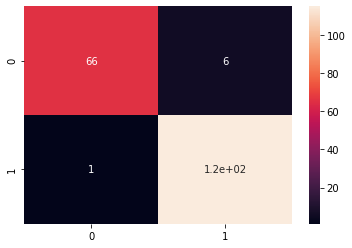

In [29]:
# accuracy on training data
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
X_test_prediction = model.predict(X_test)
X_test_prediction = (X_test_prediction > 0.5)
#training_data_accuracy = accuracy_score(y_test,X_test_prediction)

print(classification_report(X_test_prediction,y_test))
cm = confusion_matrix(X_test_prediction,y_test)
sns.heatmap(cm,annot=True)


# Model Evaluation of Neural Networks using accuracy score

In [30]:
test_data_accuracy = accuracy_score(X_test_prediction,y_test)
print('Accuracy on Test data using Neural Networks : ', test_data_accuracy*100)

Accuracy on Test data using Neural Networks :  96.27659574468085


# Training the model using Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators = 100)
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Model Evaluation of Random Forest Classifier

In [32]:
X_test_prediction2 = model2.predict(X_test)
test_data_accuracy2 = accuracy_score(X_test_prediction2, y_test)

In [33]:
print('Accuracy on Test data using Random Forest Classifier : ', test_data_accuracy2*100)

Accuracy on Test data using Random Forest Classifier :  94.14893617021278


# Prediction of new data using Random Forest Classifier

In [44]:
model2.predict(scaler.transform(np.array([[17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890]])))

array([0], dtype=int64)

In [40]:
model2.predict(scaler.transform(np.array([[13.08,15.71,85.63,520.0,0.1075,0.127,0.04568,0.0311,0.1967,0.06811,0.1852,0.7477,1.383,14.67,0.004097,0.01898,0.016980000000000002,0.006490000000000001,0.01678,0.002425,14.5,20.49,96.09,630.5,0.1312,0.2776,0.18899999999999997,0.07282999999999999,0.3184,0.08183]])))

array([1], dtype=int64)

# Prediction of new data using Neural Networks

In [36]:
model.predict(scaler.transform(np.array([[17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890]])))

array([[1.]], dtype=float32)

In [37]:
model.predict(scaler.transform(np.array([[12.05,14.63,78.04,449.3,0.1031,0.09092,0.06592,0.027489999999999997,0.1675,0.06043,0.2636,0.7294,1.848,19.87,0.005488,0.01427,0.023219999999999998,0.00566,0.014280000000000001,0.0024219999999999997,13.76,20.7,89.88,582.6,0.1494,0.2156,0.305,0.06548,0.2747,0.08301]])))

array([[0.99999666]], dtype=float32)

In [45]:
model.predict(scaler.transform(np.array([[13.49,22.3,86.91,561.0,0.08752,0.07697999999999999,0.047510000000000004,0.033839999999999995,0.1809,0.057179999999999995,0.2338,1.3530000000000002,1.735,20.2,0.004455,0.013819999999999999,0.02095,0.01184,0.01641,0.001956,15.15,31.82,99.0,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917000000000001]])))

array([[0.6342011]], dtype=float32)